In [1]:
import pandas as pd  # Data handling
import numpy as np  # Math functions
import matplotlib.pyplot as plt  # To plot graphs
import seaborn as sns  # For nice graphs

from sklearn.model_selection import train_test_split  # To split data
from sklearn.feature_extraction.text import TfidfVectorizer  # Text to numbers
from sklearn.naive_bayes import MultinomialNB  # Machine learning model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Map 'ham' to 0 and 'spam' to 1
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
from sklearn.model_selection import train_test_split

X = df['message']         # Features
y = df['label_num']       # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [7]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_counts, y_train)

MultinomialNB()

In [8]:
y_pred = model.predict(X_test_counts)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9919282511210762

Confusion Matrix:
 [[966   0]
 [  9 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



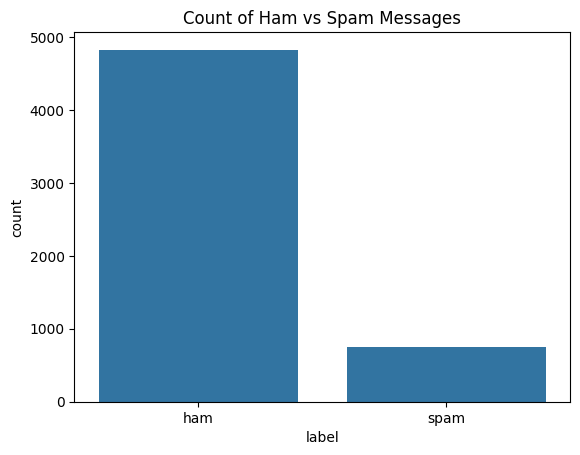

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Count of Ham vs Spam Messages")
plt.show()